# EWMA and Holt-Winters

In this notebook, we will look at the exponentially weighted moving average (EWMA) and Holt-winters.

## EWMA

In [1]:
# get the data for airline passengers
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2021-11-23 09:42:19--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0.002s  

2021-11-23 09:42:20 (815 KB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [2]:
# imports
import pandas as pd
import numpy as np

In [3]:
# read in the data
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# check for missing values
df.isna().sum()

Passengers    0
dtype: int64

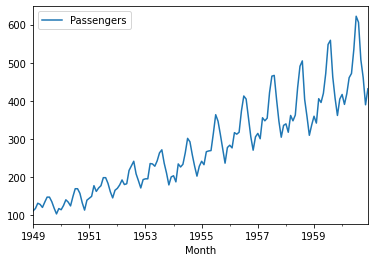

In [6]:
df.plot();

In [7]:
# set alpha for the EWMA below
alpha = 0.2

In [8]:
# calc exponentially weighted moving average
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [9]:
# check data type returned by ewm
type(df['Passengers'].ewm(alpha=alpha, adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

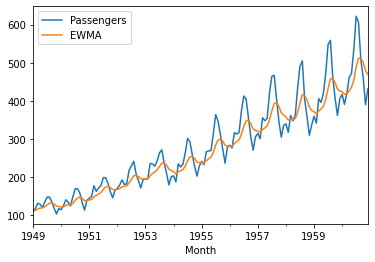

In [10]:
# plot again including our EWMA
df.plot();

In [11]:
manual_ewma = []
for x in df['Passengers'].to_numpy():
    if len(manual_ewma) > 0:
        xhat = alpha * x + (1 - alpha) * manual_ewma[-1]
    else:
        xhat = x
    manual_ewma.append(xhat)
df['Manual'] = manual_ewma

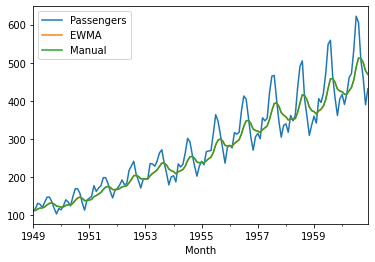

In [12]:
# plot again - this should match the above graph
df.plot();

In [13]:
# confirm manual method matches what we get using ewm in pandas
df.head()

,Passengers,EWMA,Manual
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


In [14]:
# drop manual from the df
df.drop('Manual', axis=1, inplace=True)

## Simple Exponential Smoothing